# Problem Set 6
## Juan Roa A15541981

### 1st block (import dataset)

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

### 2nd block (import other libraries / graph modifications)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

plt.rcParams.update({'font.size':15})

### 3rd block (create function)

In [28]:
def lin_reg(x, y):
  # creates two subplots
  fig,axes = plt.subplots(1, 2, figsize=[15,15])

  # creates list of R^2 scores
  R_2s = []

  # loops through each feature
  for i in range(len(X.columns)):
    # creates training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X[[X.columns[i]]], y, test_size=0.35, random_state=2)

    # fits linear regression model for both training and testing data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # appends R^2 scores to R^2 list
    R_2s.append(model.score(X_train, y_train))
  
  # finds index with greatest R^2 score
  best_feat = R_2s.index(max(R_2s))

  # creates training and testing data
  X_train, X_test, y_train, y_test = train_test_split(X[[X.columns[best_feat]]], y,
                                                      test_size=0.35, random_state=2)

  # fits linear regression model for both training and testing data
  model = LinearRegression()
  model.fit(X_train, y_train)

  # gets predicted y data for x inputs from the model
  predict_train = model.predict(X_train)
  predict_test = model.predict(X_test)

  # creates titles for training and testing plots
  train_R2 = '\nR^2 score = ' + str(round(model.score(X_train, y_train), 3))
  test_R2 = '\nR^2 score = ' + str(round(model.score(X_test, y_test), 3))

  textstr_train = 'Feature = ' + str(X_train.columns[0]) + train_R2
  textstr_test = 'Feature = ' + str(X_test.columns[0]) + test_R2

  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

  # plots training graph onto left subplot
  axes[0].scatter(X_train[X_train.columns[0]], y_train)
  axes[0].plot(X_train[X_train.columns[0]], predict_train, color='orange')
  axes[0].set_title('Training Data', fontsize=20)
  axes[0].text(0.075, 335, textstr_train, bbox=props)
  axes[0].set_xlim(-0.12,0.2)
  axes[0].set_ylim(0, 350)

  # plots testing graph onto right subplot
  axes[1].scatter(X_test[X_test.columns[0]], y_test)
  axes[1].plot(X_test[X_test.columns[0]], predict_test, color='orange')
  axes[1].set_title('Testing Data', fontsize=20)
  axes[1].text(0.075, 335, textstr_test, bbox=props)
  axes[1].set_xlim(-0.12,0.2)
  axes[1].set_ylim(0, 350)

  plt.tight_layout(rect=(2,2,0,0))

### 4th block (show working function)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


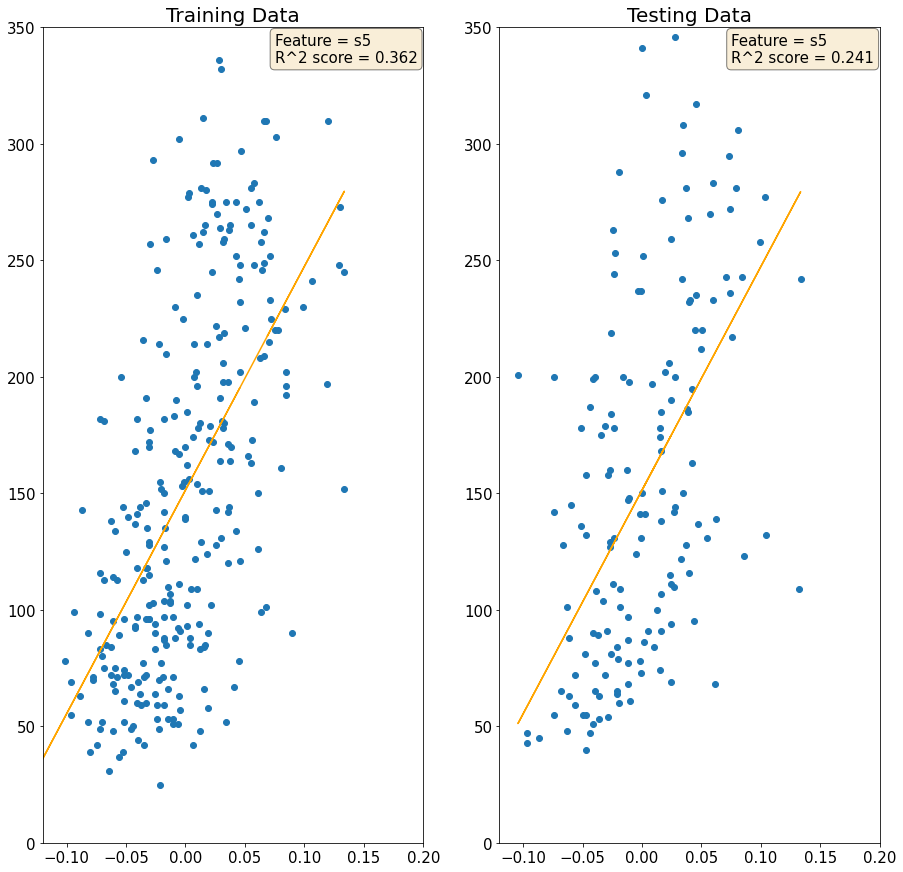

In [29]:
lin_reg(X, y)

### 5th block (find best feature)

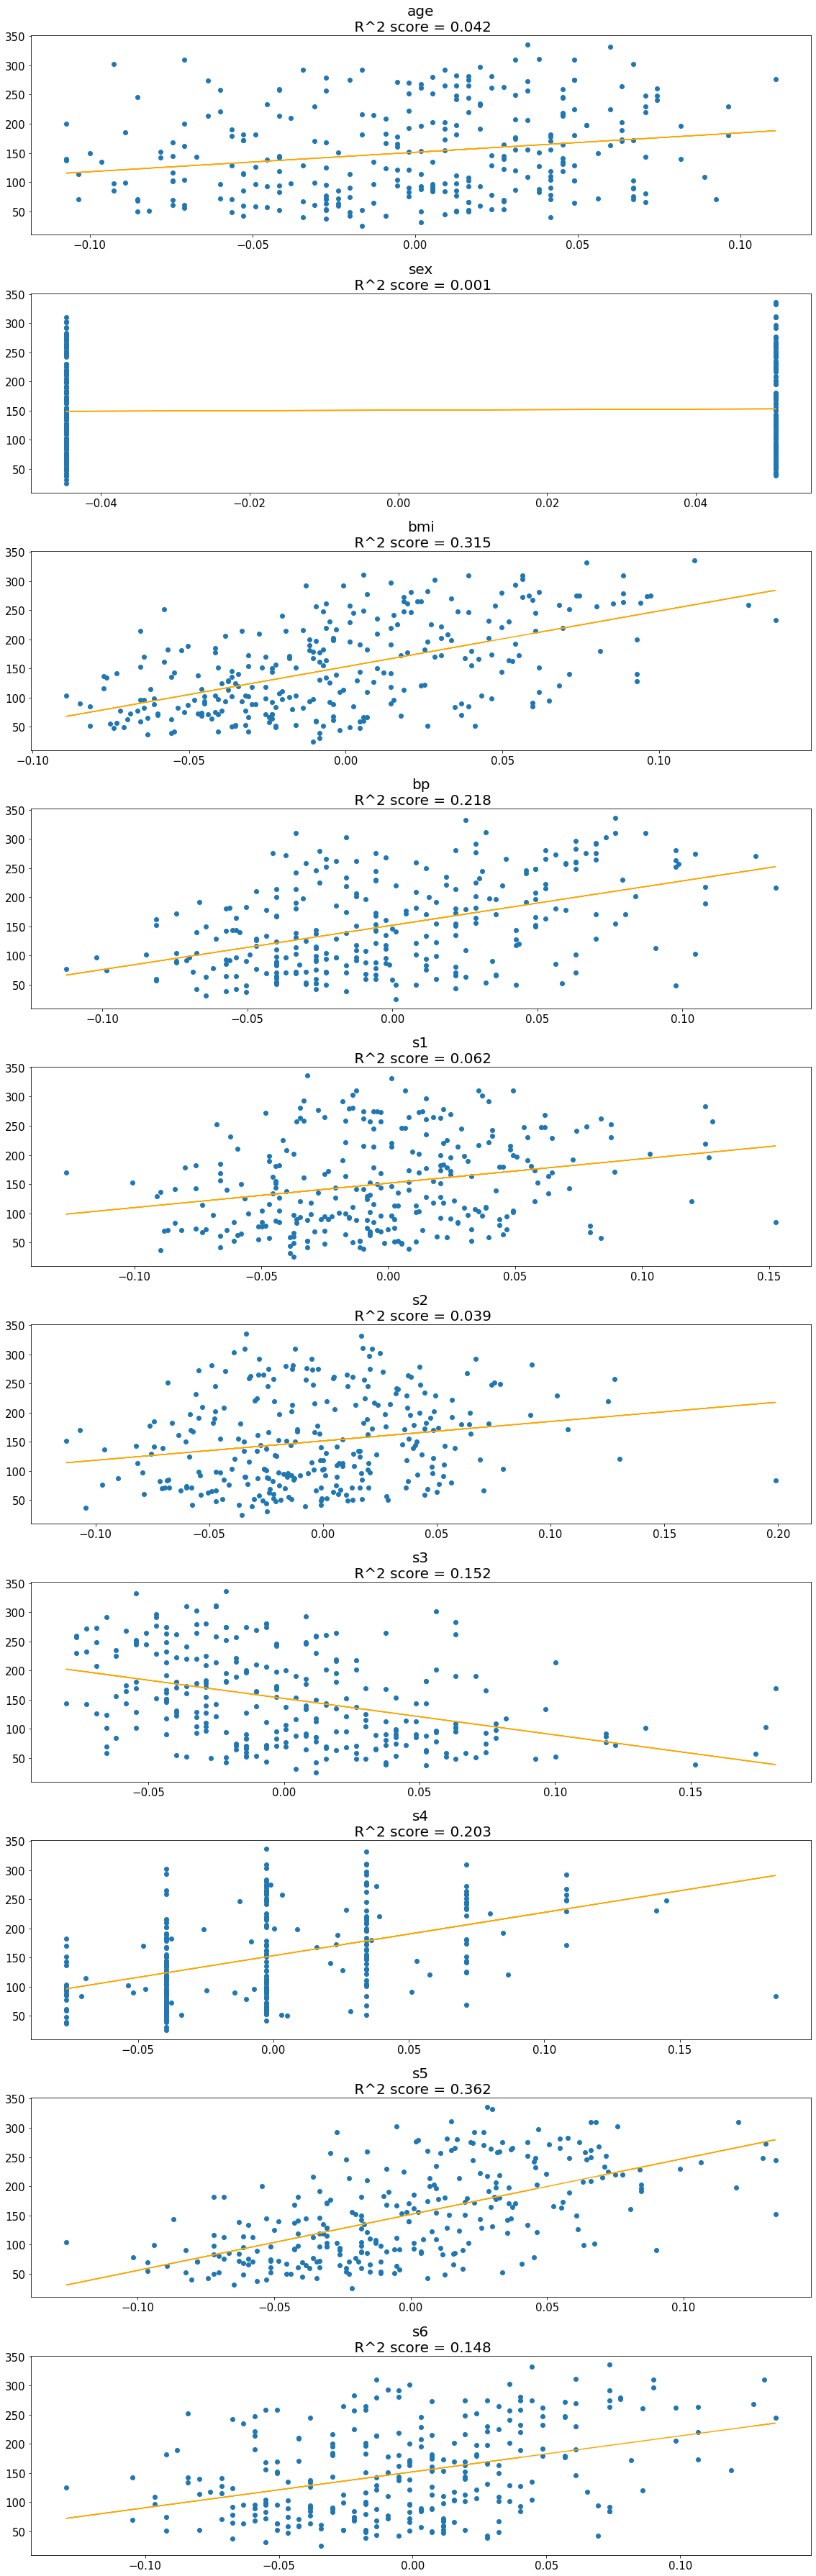

In [31]:
# creates one column of subplots
fig,axes = plt.subplots(len(X.columns), 1, figsize=[8,25])

for i in range(len(X.columns)):
  # creates trainging and testing data
  X_train, X_test, y_train, y_test = train_test_split(X[[X.columns[i]]], y, test_size=0.35, random_state=2)

  # fits linear regression model to training data for x and y
  model = LinearRegression()
  model.fit(X_train, y_train)

  # gets predicted y data for x inputs from the model
  predict = model.predict(X_train)

  # creates text box
  textstr = str(X_train.columns[0]) + '\n R^2 score = ' + str(round(model.score(X_train, y_train), 3))
  
  # plots the graph onto a subplot
  axes[i].scatter(X_train[X_train.columns[0]], y_train)
  axes[i].plot(X_train[X_train.columns[0]], predict, color='orange')
  axes[i].set_title(textstr, fontsize=20)
  

plt.tight_layout(rect=(0,0,2,2))

#### Note: this is to visually show the difference between each feature and the best feature can be observed through R^2 scores. The best feature is shown below through the use of the function created in block 3. The training and testing data is also shown through the use of the function

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


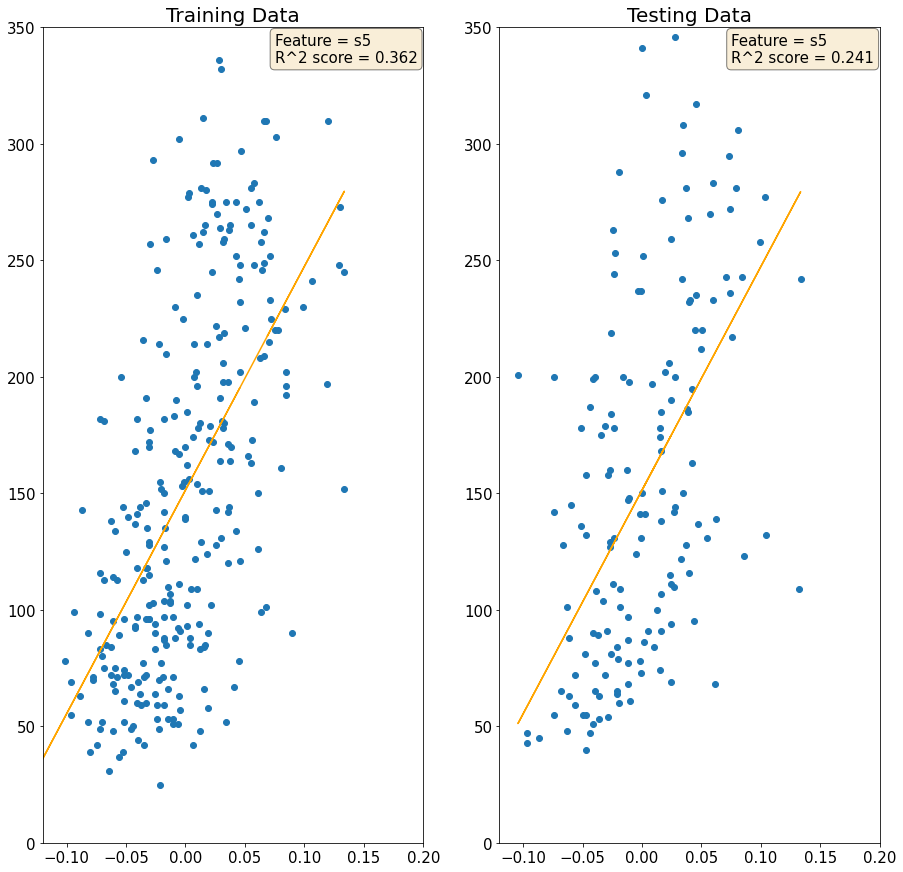

In [30]:
lin_reg(X, y)

### 6th block (make figures)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


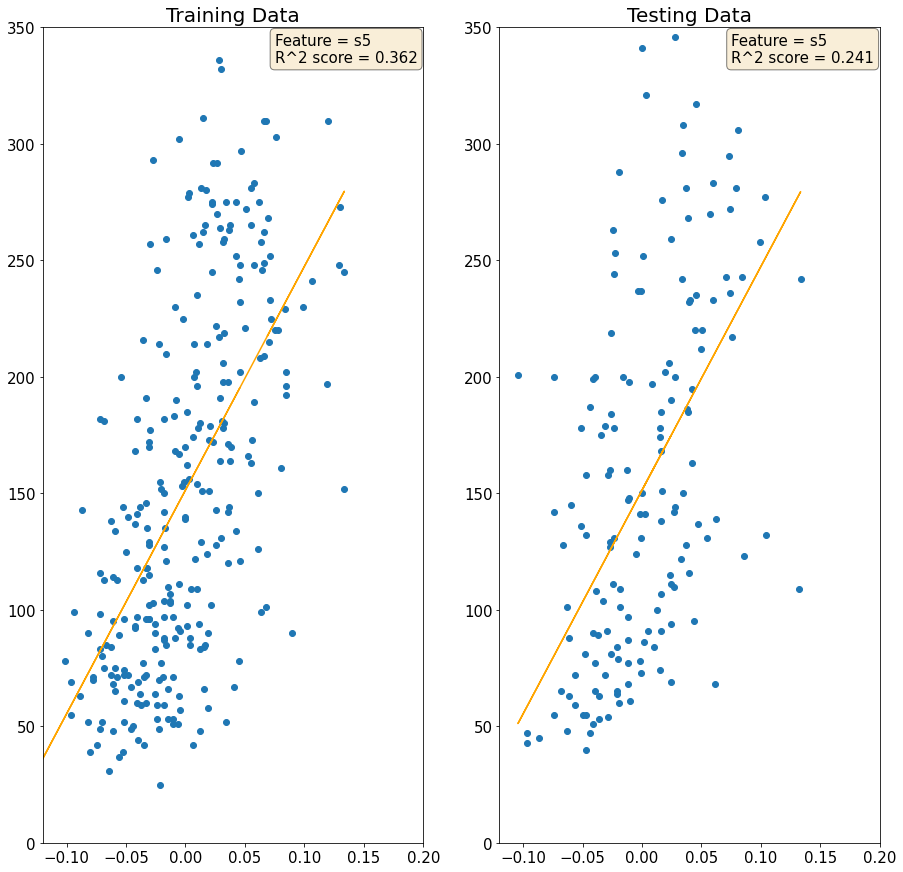

In [32]:
lin_reg(X,y)

### 7th block (perform steps 5 and 6 in a for loop)

This was performed by putting a for loop inside the function made in block 3 which performed the goals of blocks 5 and 6. Not too sure if this was the goal of this extra point, but that's the way I took it and ran with it haha